# Creating Customer Segments by RFM score Using Clustering 
### Kanja Saha,12/22/ 2017

## Steps
1. <a href='#import_lib'>Import Libraries</a>
1. <a href='#import_data'>Import Data</a>
2. <a href='#preprocess'>Preprocess Data</a>
3. <a href='#explore'>Explore Data</a>
3. <a href='#implement'>Implement Algorithms</a>

## Import Libraries
<a id='import_lib'></a>
In general, import all libraries before importing data. However, for learning purpose, import libraries in each step as needed. This is will give a better understanding of the libraries and their functions.

In [1]:
# Import libraries necessary for this project
#For all data processing functions
#import panda as pd 

#For all numerical processing
#import numpy as np 

#from IPython.display import display # Allows the use of display() for DataFrames
#import matplotlib.pyplot as plt

# Import supplementary visualizations code visuals.py
#import visuals as vs


## Import Data
<a id='import_data'></a>
In general, import all needed libraries before importing data. If this is a learning execise, import libraries in each step as needed. This is will give a better understanding of the libraries. 

In [2]:
#import necessary libraries
import numpy as np 
import pandas as pd
from IPython.display import display

# Load the dataset into pandas dataframe
raw_data = pd.read_excel("Online_Retail.xlsx")
print ("Dataset has {} rows(samples) with {} columns(features) each.".format(*raw_data.shape))

# display the top 5 rows of the dataset
raw_data.head(5)

Dataset has 541909 rows(samples) with 8 columns(features) each.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
#summary of dataset's distribution
raw_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
#items with negative quantity implies returned items, and 0 implies no purchase
raw_data[raw_data.Quantity<=0].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


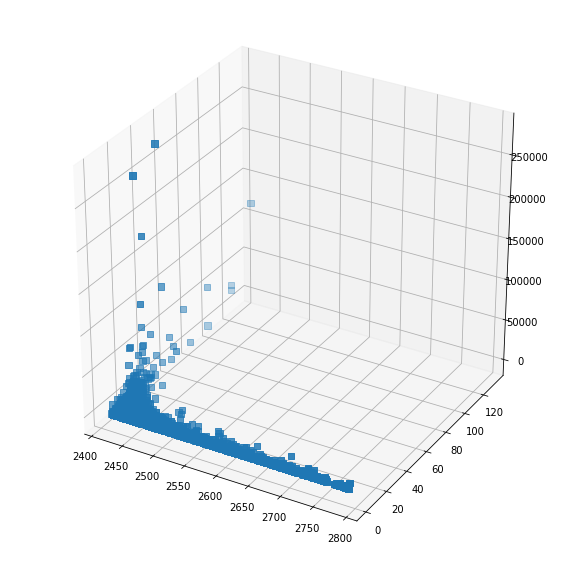

In [20]:
#plot all data in 3d to see if any outlier
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
x = np.array(data['recency'])
y = np.array(data['frequency'])
z = np.array(data['monetization'])

ax.scatter(x,y,z, marker="s",s=40, cmap=custom_cmap)

plt.show()

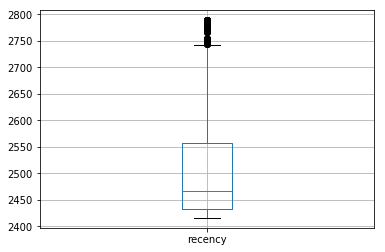

In [24]:
#plot them in boxplot
import pandas as pd

df = pd.DataFrame(data = data, columns = ['recency'])#,'frequency','monetization'])
df.boxplot()
#df = pd.DataFrame(data = data, columns = ['frequency'])#,'frequency','monetization'])
#df.boxplot()

In [5]:
from datetime import datetime
#calculate recency for each transaction
currentDT = pd.to_datetime(datetime.now().date())
raw_data['Recency']= (pd.to_datetime(datetime.now().date())-pd.to_datetime(raw_data.InvoiceDate)).dt.days

# store the returned items in a dataset
returned_invoices=raw_data[raw_data.Quantity<0]
returned_invoices['Quantity']=returned_invoices['Quantity']*-1

# remove transactions that has negative or 0 quantity or with unit price
raw_data=raw_data[(raw_data.Quantity>0) & (raw_data.UnitPrice>0)]

# get the list of items that are purchased and then returned
keys = ['CustomerID', 'StockCode','Quantity']
i1 = raw_data.set_index(keys).index
i2 = returned_invoices.set_index(keys).index
raw_data_filtered=raw_data[~i1.isin(i2)]


C:\Users\kanja\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
import numpy as np

#Calculate revenue(monetization) generated by each customer
def total_price(raw_data_filtered):
    x = (raw_data_filtered.Quantity * raw_data_filtered.UnitPrice)
    return np.sum(x)

data=pd.DataFrame()
data['monetization']=raw_data_filtered.groupby('CustomerID').apply(total_price)
#get the recency of the account
data['recency']=raw_data.groupby('CustomerID').agg({'Recency': np.min})
#get the total number of transactions
data['frequency']=raw_data.groupby('CustomerID').Recency.nunique()

#save customer_id which is an index in the data frame 
CustomerID=data.index
# show summary of the data distribution
data.describe()


,monetization,recency,frequency
count,4324.000000,4324.000000,4324.000000
mean,1924.122274,2507.968085,3.873265
std,8228.468418,100.039894,5.956480
min,2.900000,2416.000000,1.000000
25%,305.475000,2433.000000,1.000000
50%,663.630000,2466.000000,2.000000
75%,1624.420000,2557.000000,4.000000
max,278528.420000,2789.000000,132.000000


## Preprocess Data
<a id='preprocess'></a>


In [7]:
from sklearn import preprocessing

print('Is there null value in the data frame? {}.' .format('Yes' if (data.isnull().values.any()) else 'No' ))
if (data.isnull().values.any()):
    print(data.isnull().sum())

#normalize all the columns(features) so that all the values in the column lie between 0 and 1
#this way each features will get equal preference regardless of their actual range
n_data=pd.DataFrame()
n_data = pd.DataFrame(preprocessing.normalize(data),columns=data.columns)
n_data.head(5)

Is there null value in the data frame? No.


,monetization,recency,frequency
0,0.872125,0.489281,0.001416
1,0.585102,0.810959,0.001302
2,0.585416,0.810733,0.000333
3,0.121758,0.992560,0.000364
4,0.497241,0.867609,0.002477


## Explore Data 


For K-means n_clusters = 2. The average silhouette_score is : 0.5898505014145282
For K-means n_clusters = 3. The average silhouette_score is : 0.48723131350162746
For K-means n_clusters = 4. The average silhouette_score is : 0.46498358654723043
For K-means n_clusters = 5. The average silhouette_score is : 0.4548079529086275
For K-means n_clusters = 6. The average silhouette_score is : 0.43292017148933215
For K-means n_clusters = 7. The average silhouette_score is : 0.41953113431848565
For K-means n_clusters = 8. The average silhouette_score is : 0.42006378486450907
For K-means n_clusters = 9. The average silhouette_score is : 0.38251289320549936
For K-means n_clusters = 10. The average silhouette_score is : 0.3883858858786213
For K-means n_clusters = 11. The average silhouette_score is : 0.3532408682467982
For K-means n_clusters = 12. The average silhouette_score is : 0.36068632679335677
For K-means n_clusters = 13. The average silhouette_score is : 0.3550598026513615
For K-means n_clu

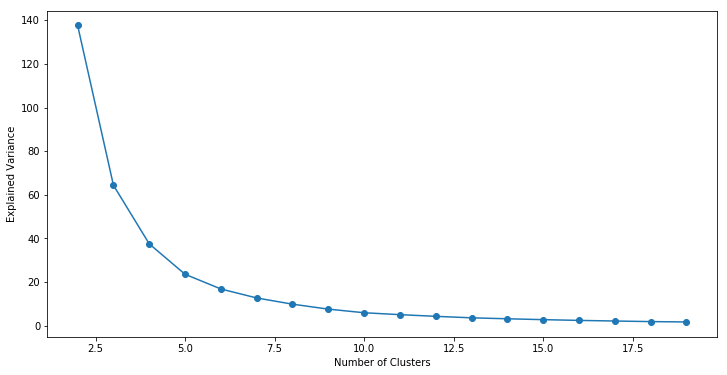

In [8]:
#Elbow method & silhouette_score
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
# Pretty display for notebooks
%matplotlib inline

cluster_range = range( 2, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(n_data)
    preds = clusters.predict(n_data)
    cluster_errors.append( clusters.inertia_ )
    score = silhouette_score(data, preds, metric='euclidean')
    print ("For K-means n_clusters = {}. The average silhouette_score is : {}".format(num_clusters, score))

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

plt.figure(figsize=(12,6))
plt.ylabel('Explained Variance')
plt.xlabel('Number of Clusters')
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

## Implement Algorithms 
<a id='implement'></a>


In [9]:
#Select a few observations to sample from the dataset
indices = [4000,3000,2,1400,1111]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(n_data.loc[indices], columns = n_data.keys()).reset_index(drop = True)
samples_z = pd.DataFrame(n_data.loc[indices], columns = n_data.keys()).reset_index(drop = True)
print ("Chosen samples of dataset:")

#calculate the z score to understand the location of the feauture for each customer in density plot
for col in n_data.columns:
    col_zscore = col + '_zscore'
    samples_z[col_zscore] = (samples_z[col] - data[col].mean())/data[col].std()
samples_z

Chosen samples of dataset:


,monetization,recency,frequency,monetization_zscore,recency_zscore,frequency_zscore
0,0.020440,0.999791,0.000396,-0.233835,-25.059686,-0.650194
1,0.072073,0.997399,0.000382,-0.233828,-25.059709,-0.650197
2,0.585416,0.810733,0.000333,-0.233766,-25.061575,-0.650205
3,0.982172,0.187985,0.000620,-0.233718,-25.067800,-0.650157
4,0.672110,0.740448,0.002434,-0.233756,-25.062278,-0.649852


In [10]:
#n_data.drop(['CustomerID'], axis = 1, inplace = True)
#n_data.drop(['cluster'], axis = 1, inplace = True)

In [11]:
#Find cluster centers and size using Kmeans
# Loop through clusters
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
range_n_clusters = range(5,6)
for n_clusters in range_n_clusters:
    #Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n_clusters).fit(n_data)

    #Predict the cluster for each data point
    preds = clusterer.predict(n_data)
    
    #Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(samples)

    #cluster centers
    centers = clusterer.cluster_centers_
    score=silhouette_score(n_data, preds, metric='euclidean')

    #centroids of each cluster
    centers_df = pd.DataFrame(centers)
    centers_df.columns=data.columns
    
    cluster_size=np.bincount(preds)
    centers_df.insert(loc=0, column='cluster_size', value=cluster_size)
    centers_df_int64=centers_df#.astype('int64')
    
    print ("For n_clusters = {}".format(n_clusters))
    print("Silhouette Coefficient: %0.3f" % score )

    display(centers_df_int64)    

For n_clusters = 5
Silhouette Coefficient: 0.591


,cluster_size,monetization,recency,frequency
0,661,0.542097,0.836207,0.001534
1,1828,0.104053,0.993293,0.000546
2,483,0.775000,0.624382,0.001784
3,1054,0.301454,0.951144,0.001048
4,298,0.946969,0.293466,0.001592


In [12]:
n_data['customer_id']=CustomerID
n_data['cluster'] = pd.Series(preds, index=n_data.index)
n_data.to_csv('normalizeddata_withcluster_rfm.csv', index=False)
display(n_data.head(5))


data['customer_id']=CustomerID
data['cluster'] = pd.Series(preds, index=data.index)

df=pd.merge(data, n_data, how='inner', on='customer_id', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False
         )
df.to_csv('data_withcluster_rfm.csv', index=False)
df.head(5)

,monetization,recency,frequency,customer_id,cluster
0,0.872125,0.489281,0.001416,12347.0,2
1,0.585102,0.810959,0.001302,12348.0,0
2,0.585416,0.810733,0.000333,12349.0,0
3,0.121758,0.992560,0.000364,12350.0,1
4,0.497241,0.867609,0.002477,12352.0,0


,monetization_x,recency_x,frequency_x,customer_id,cluster_x,monetization_y,recency_y,frequency_y,cluster_y
0,4310.00,2418,7,12347.0,2,0.872125,0.489281,0.001416,2
1,1797.24,2491,4,12348.0,0,0.585102,0.810959,0.001302,0
2,1757.55,2434,1,12349.0,0,0.585416,0.810733,0.000333,0
3,334.40,2726,1,12350.0,1,0.121758,0.992560,0.000364,1
4,1405.28,2452,7,12352.0,0,0.497241,0.867609,0.002477,0


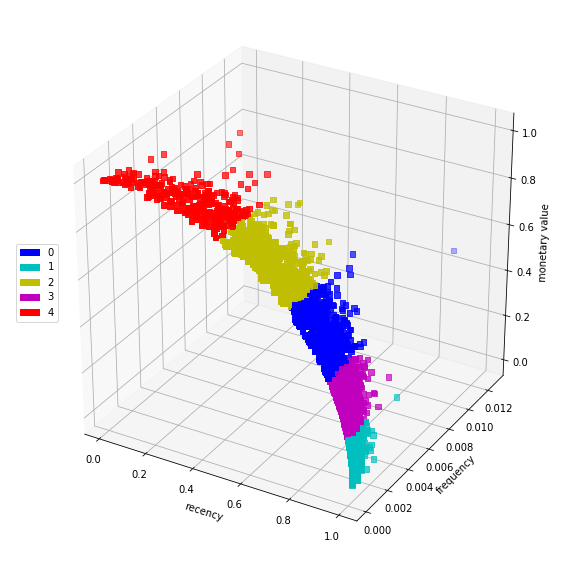

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, xlabel='recency',ylabel='frequency',zlabel='monetary value',projection='3d')
x = np.array(n_data['recency'])
y = np.array(n_data['frequency'])
z = np.array(n_data['monetization'])

colors=['b', 'c', 'y', 'm', 'r']
custom_cmap = LinearSegmentedColormap.from_list("my_colormap", colors)

clusters=[0,1,2,3,4]

# marker="s" for square, s=30 is for size of the square
ax.scatter(x,y,z, marker="s", c=n_data["cluster"], s=30, cmap=custom_cmap)
import matplotlib.patches as mpatches

recs = []
for i in range(0,len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,clusters,loc=6)

plt.show()

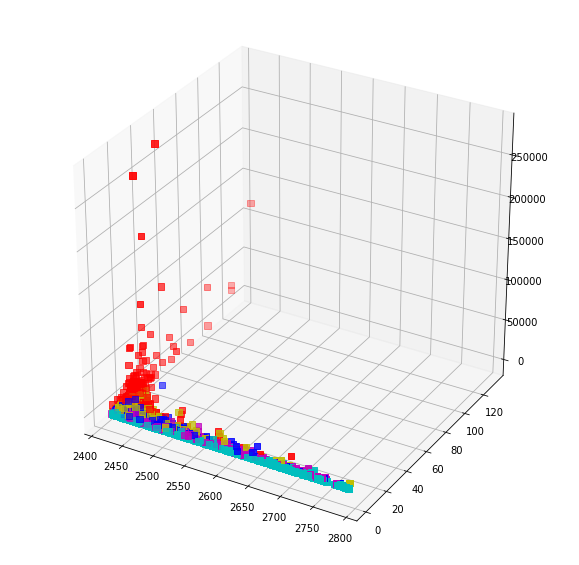

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
x = np.array(data['recency'])
y = np.array(data['frequency'])
z = np.array(data['monetization'])

ax.scatter(x,y,z, marker="s", c=data["cluster"], s=40, cmap=custom_cmap)

plt.show()

In [15]:
#Find cluster centers and size using GaussianMixture
# Loop through clusters
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

if 'customer_id' in n_data.columns:
    n_data.drop(['customer_id'], axis = 1, inplace = True)
if 'cluster' in n_data.columns:
    n_data.drop(['cluster'], axis = 1, inplace = True)

range_n_clusters = range(2,10)
for n in range_n_clusters:
    #Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=n).fit(n_data)

    #Predict the cluster for each data point
    preds = clusterer.predict(n_data)
    
    #Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(samples)

    #cluster centers
    centers = clusterer.means_
    score = silhouette_score(n_data, preds, metric='mahalanobis')

    #centroids of each cluster
    centers_df = pd.DataFrame(centers)
    
    
    cluster_size=np.bincount(preds)
    centers_df.insert(loc=0, column='cluster_size', value=cluster_size)
    centers_df_int64=centers_df#.astype('int64')
    
    print ("For GMM with n_clusters = {}. The average silhouette_score is : {}".format(n, score))
    display(centers_df_int64)  
    #Display the predictions
    for i, pred in enumerate(sample_preds):
        print ("Sample point", i, "predicted to be in Cluster", pred)

For GMM with n_clusters = 2. The average silhouette_score is : 0.39506348290549576


,cluster_size,0,1,2
0,1811,0.637178,0.708480,0.001548
1,2513,0.147005,0.985436,0.000657


Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0
Sample point 3 predicted to be in Cluster 0
Sample point 4 predicted to be in Cluster 0
For GMM with n_clusters = 3. The average silhouette_score is : 0.32724956007964495


,cluster_size,0,1,2
0,1922,0.109370,0.992495,0.00056
1,1093,0.773178,0.583091,0.00170
2,1309,0.356436,0.928709,0.00116


Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1
Sample point 3 predicted to be in Cluster 1
Sample point 4 predicted to be in Cluster 1
For GMM with n_clusters = 4. The average silhouette_score is : 0.3204677813753358


,cluster_size,0,1,2
0,1095,0.297718,0.952150,0.001036
1,637,0.872336,0.449247,0.001686
2,1788,0.101772,0.993610,0.000541
3,804,0.571831,0.813046,0.001590


Sample point 0 predicted to be in Cluster 2
Sample point 1 predicted to be in Cluster 2
Sample point 2 predicted to be in Cluster 3
Sample point 3 predicted to be in Cluster 1
Sample point 4 predicted to be in Cluster 3
For GMM with n_clusters = 5. The average silhouette_score is : 0.3323786432043626


,cluster_size,0,1,2
0,485,0.770555,0.629880,0.001774
1,1063,0.296571,0.952697,0.001034
2,311,0.944937,0.298900,0.001607
3,668,0.536624,0.839691,0.001531
4,1797,0.102576,0.993498,0.000543


Sample point 0 predicted to be in Cluster 4
Sample point 1 predicted to be in Cluster 4
Sample point 2 predicted to be in Cluster 3
Sample point 3 predicted to be in Cluster 2
Sample point 4 predicted to be in Cluster 0
For GMM with n_clusters = 6. The average silhouette_score is : 0.30066229012999135


,cluster_size,0,1,2
0,259,0.955539,0.268567,0.001546
1,918,0.253950,0.965981,0.000932
2,366,0.818871,0.567925,0.001775
3,1662,0.095208,0.994482,0.000524
4,468,0.639677,0.765080,0.001698
5,651,0.438788,0.896239,0.001355


Sample point 0 predicted to be in Cluster 3
Sample point 1 predicted to be in Cluster 3
Sample point 2 predicted to be in Cluster 4
Sample point 3 predicted to be in Cluster 0
Sample point 4 predicted to be in Cluster 4
For GMM with n_clusters = 7. The average silhouette_score is : 0.27124545474769307


,cluster_size,0,1,2
0,873,0.222099,0.974088,0.000847
1,288,0.863088,0.499316,0.001854
2,474,0.539763,0.839668,0.001548
3,393,0.713892,0.696669,0.001744
4,593,0.371458,0.927117,0.001192
5,196,0.967842,0.227780,0.001445
6,1507,0.087413,0.995402,0.000508


Sample point 0 predicted to be in Cluster 6
Sample point 1 predicted to be in Cluster 6
Sample point 2 predicted to be in Cluster 2
Sample point 3 predicted to be in Cluster 5
Sample point 4 predicted to be in Cluster 3
For GMM with n_clusters = 8. The average silhouette_score is : 0.2629876156174542


,cluster_size,0,1,2
0,861,0.214720,0.975800,0.000832
1,364,0.661463,0.747570,0.001740
2,195,0.914988,0.398692,0.001845
3,579,0.355152,0.933694,0.001158
4,1464,0.085625,0.995599,0.000504
5,434,0.507707,0.860029,0.001488
6,127,0.982034,0.169157,0.001278
7,300,0.804341,0.590706,0.001746


Sample point 0 predicted to be in Cluster 4
Sample point 1 predicted to be in Cluster 4
Sample point 2 predicted to be in Cluster 5
Sample point 3 predicted to be in Cluster 6
Sample point 4 predicted to be in Cluster 1
For GMM with n_clusters = 9. The average silhouette_score is : 0.22515838414840952


,cluster_size,0,1,2
0,958,0.063822,0.997632,0.000471
1,309,0.790508,0.609108,0.001752
2,135,0.980414,0.176750,0.001317
3,386,0.512321,0.857578,0.001511
4,663,0.258176,0.965467,0.000943
5,216,0.906228,0.417277,0.001854
6,336,0.652058,0.756166,0.001709
7,866,0.148359,0.988510,0.000629
8,455,0.380767,0.923857,0.001221


Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 6
Sample point 3 predicted to be in Cluster 2
Sample point 4 predicted to be in Cluster 6


In [16]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn import metrics


if 'customer_id' in n_data.columns:
    n_data.drop(['customer_id'], axis = 1, inplace = True)
if 'cluster' in n_data.columns:
    n_data.drop(['cluster'], axis = 1, inplace = True)


clusterer_DB = DBSCAN(eps=.01, metric='euclidean', min_samples=1).fit(n_data)
labels_DB = clusterer_DB.labels_

#display(labels_DB)
display(len(set(labels_DB)))

score_DB=silhouette_score(n_data, labels_DB, metric='euclidean')

print("Silhouette Coefficient: %0.3f" % score_DB )

n_data['cluster']=labels_DB
n_data['customer_id']=CustomerID
n_data.head(10)

n_data[["customer_id", "cluster"]].to_csv('finaldatawithcluster_DB_monthly_frequency', index=False)

5

Silhouette Coefficient: -0.151


In [17]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

if 'customer_id' in n_data.columns:
    n_data.drop(['customer_id'], axis = 1, inplace = True)
if 'cluster' in n_data.columns:
    n_data.drop(['cluster'], axis = 1, inplace = True)


# Compute Affinity Propagation
af = AffinityPropagation().fit(n_data)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)


import matplotlib.pyplot as plt
from itertools import cycle

print(n_clusters)
n_data['cluster']=labels
n_data['customer_id']=CustomerID
n_data.head(10)

n_data[["customer_id", "cluster"]].to_csv('finaldatawithcluster_AP_monthly_frequency', index=False)

5


In [18]:
#AgglomerativeClustering

if 'customer_id' in n_data.columns:
    n_data.drop(['customer_id'], axis = 1, inplace = True)
if 'cluster' in n_data.columns:
    n_data.drop(['cluster'], axis = 1, inplace = True)


from sklearn.cluster import AgglomerativeClustering
# Affinity = {"“euclidean", “l1”, “l2”, “manhattan”,
# “cosine”}
# Linkage = {"ward"}#, “complete”, “average”}
Hclustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
Hclustering.fit_predict(n_data)
#ms = np.column_stack((ground_truth,Hclustering.labels_))
#df = pd.DataFrame(ms,
# columns = [‘Ground truth’,’Clusters’])
#pd.crosstab(df[‘Ground truth’], df[‘Clusters’],
# margins=True)

labels_HC = Hclustering.labels_

display(labels_HC)
len(set(labels_HC))

n_data['cluster']=labels_HC
n_data['customer_id']=CustomerID.astype('Int64')
display(n_data.head(10))
#true_centers_Kmeans_df_int64['cluster'] = pd.Series(true_centers_Kmeans_df_int64.index, index=true_centers_Kmeans_df_int64.index)
n_data[['customer_id','cluster']].to_csv('customerwithcluster_HC_monthly_frequency.csv', index=False)

array([1, 0, 0, ..., 3, 0, 0], dtype=int64)

,monetization,recency,frequency,cluster,customer_id
0,0.872125,0.489281,0.001416,1,12347
1,0.585102,0.810959,0.001302,0,12348
2,0.585416,0.810733,0.000333,0,12349
3,0.121758,0.992560,0.000364,3,12350
4,0.497241,0.867609,0.002477,2,12352
5,0.033950,0.999423,0.000381,3,12353
6,0.377472,0.926021,0.000350,2,12354
7,0.172071,0.985084,0.000375,3,12355
8,0.755499,0.655149,0.000806,0,12356
9,0.930227,0.366986,0.000150,1,12357


n:  [3537650. 3165026. 2806146. 2435106. 2066412. 1674050. 1304128.  932888.
  574686.  200884.] 18696976.0
bins:  [   0.          594.00000924 1188.00001847 1782.00002771 2376.00003694
 2970.00004618 3564.00005541 4158.00006465 4752.00007388 5346.00008312
 5940.00009235]
594.0000092352814
594.0000092352814
594.0000092352814
594.0000092352814
594.0000092352811
594.0000092352816
594.0000092352816
594.0000092352811
594.0000092352811
594.000009235282
patches:  <a list of 10 Patch objects>
Rectangle(xy=(594, 0), width=594, height=3.16503e+06, angle=0)


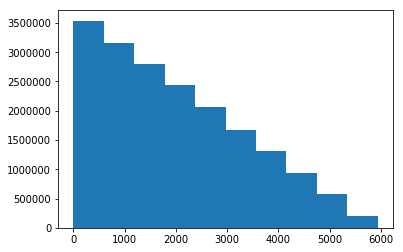

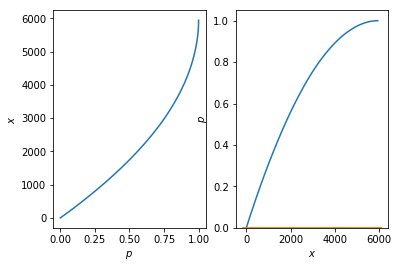

In [19]:
#data.drop(['customer_id'], axis = 1, inplace = True)
#data.drop(['cluster'], axis = 1, inplace = True)

from scipy.spatial.distance import squareform, pdist
import seaborn as sns


distance_DB=pd.DataFrame(squareform(pdist(n_data.iloc[:, 1:])))

#display(distance_DB)
distance_DB.describe()

all_numbers=distance_DB.values.tolist()

flat_list = [item for sublist in all_numbers for item in sublist]

flat_list

np.histogram(flat_list)

n, bins, patches = plt.hist(flat_list)
print("n: ", n, sum(n))
print("bins: ", bins)
for i in range(len(bins)-1):
    print(bins[i+1] -bins[i])
print("patches: ", patches)
print(patches[1])

# sort the data:
sorted_flat_list = np.sort(flat_list)

# calculate the proportional values of samples
p = 1. * np.arange(len(flat_list)) / (len(flat_list) - 1)

# plot the sorted data:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(p, sorted_flat_list)
ax1.set_xlabel('$p$')
ax1.set_ylabel('$x$')

ax2 = fig.add_subplot(122)
ax2.plot(sorted_flat_list, p)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$p$')

sns.distplot(flat_list);
